In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV


In [6]:
data = pd.read_csv('/content/student-por.csv' , delimiter =';')
features = ['studytime','failures','absences','G3','G2','G1','age','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
data = data[features]
df = pd.DataFrame(data)

data['schoolsup'] = data['schoolsup'].map({'yes':1 , 'no':0})  # 1 for extra educational support and 0 for not
data['famsup'] = data['famsup'].map({'yes':1 , 'no':0})        # 1 for family educational support and 0 for not
data['paid'] = data['paid'].map({'yes':1 , 'no':0})            # 1 for extra paid classes and 0 for not
data['activities'] = data['activities'].map({'yes':1 , 'no':0})# 1 for extra-curricular activities and 0 for not
data['nursery'] = data['nursery'].map({'yes':1 , 'no':0})      # 1 for attended nursery school and 0 for not
data['higher'] = data['higher'].map({'yes':1 , 'no':0})        # 1 for wants to take higher education and 0 for not
data['internet'] = data['internet'].map({'yes':1 , 'no':0})    # 1 for internet access and 0 for not
data['romantic'] = data['romantic'].map({'yes':1 , 'no':0})    # 1 for in a romantic relationship and 0 for not
data.head()



,studytime,failures,absences,G3,G2,G1,age,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,2,0,4,11,11,0,18,1,0,0,0,1,1,0,0
1,2,0,2,11,11,9,17,0,1,0,0,0,1,1,0
2,2,0,6,12,13,12,15,1,0,0,0,1,1,1,0
3,3,0,0,14,14,14,15,0,1,0,1,1,1,1,1
4,2,0,0,13,13,11,16,0,1,0,0,1,1,0,0


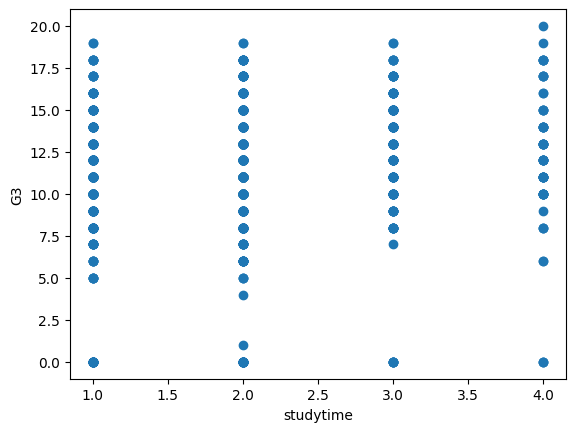

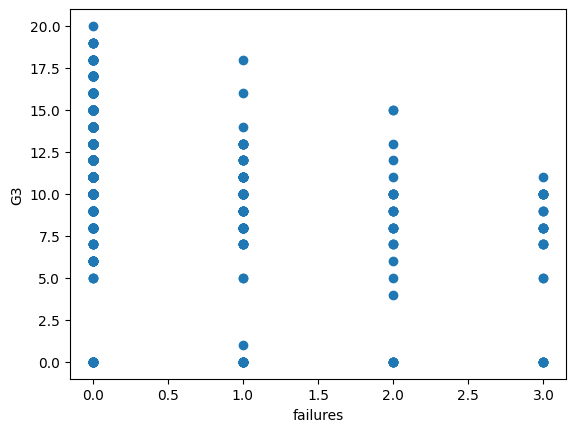

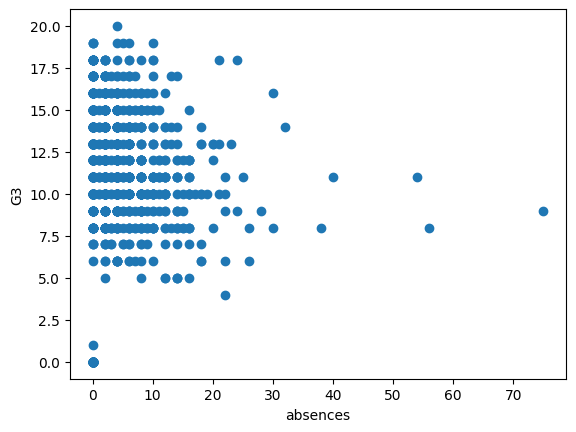

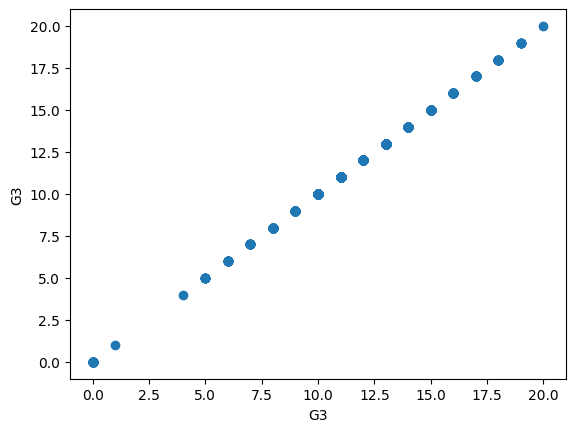

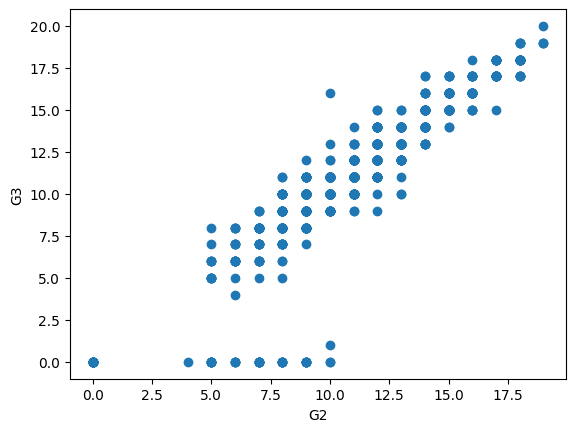

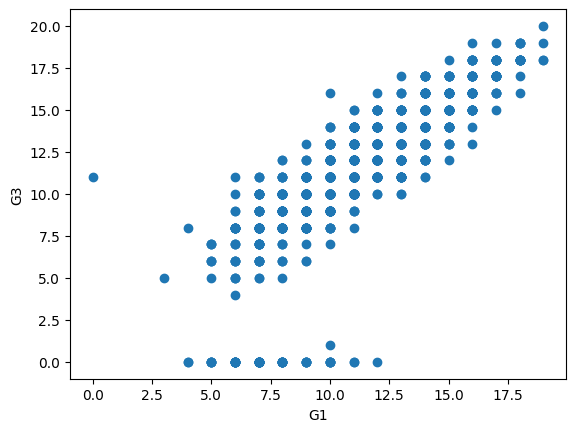

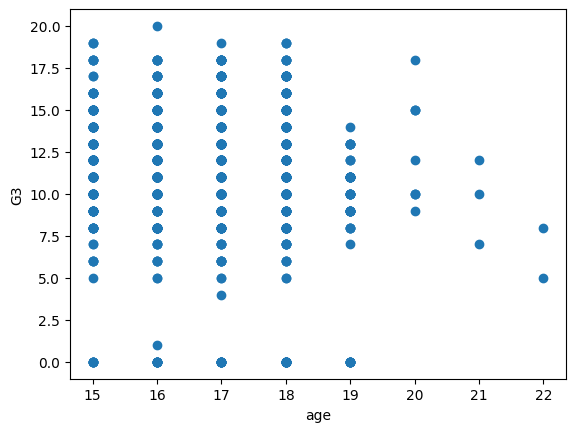

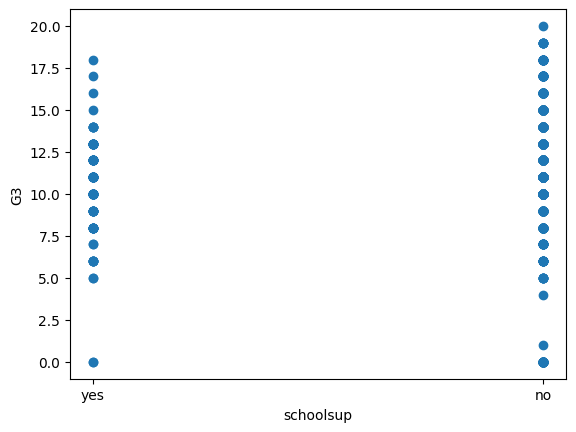

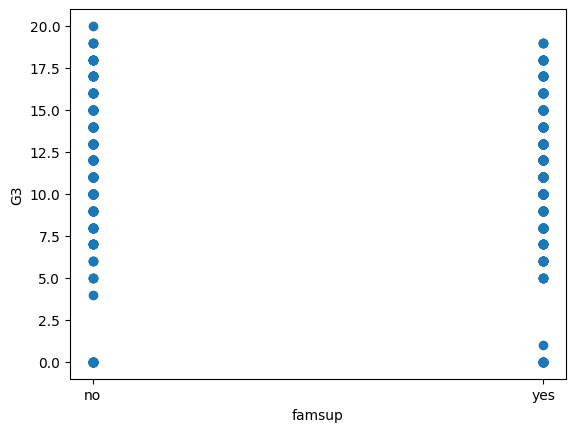

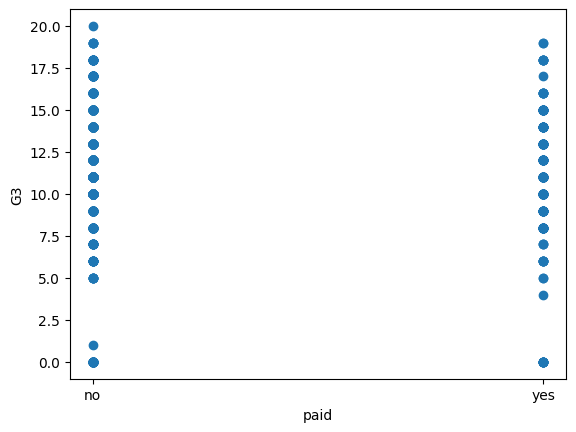

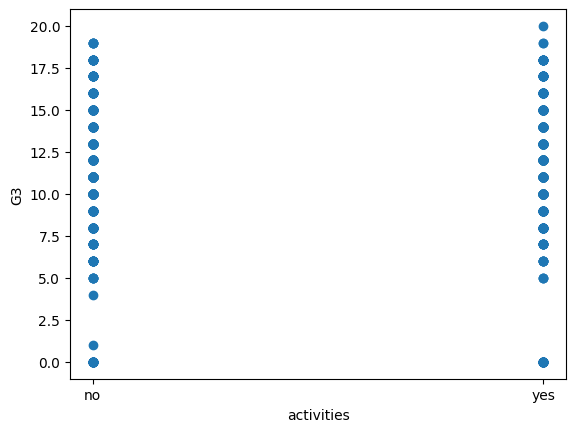

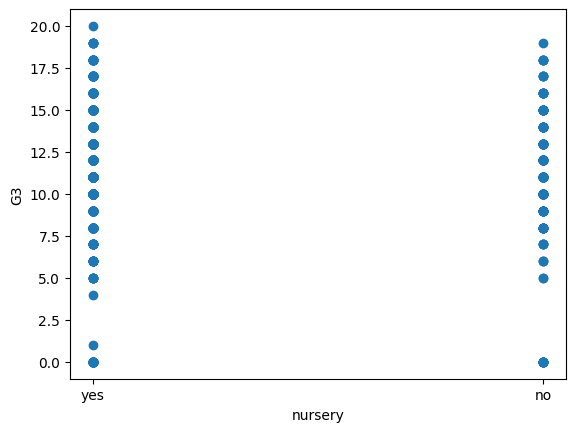

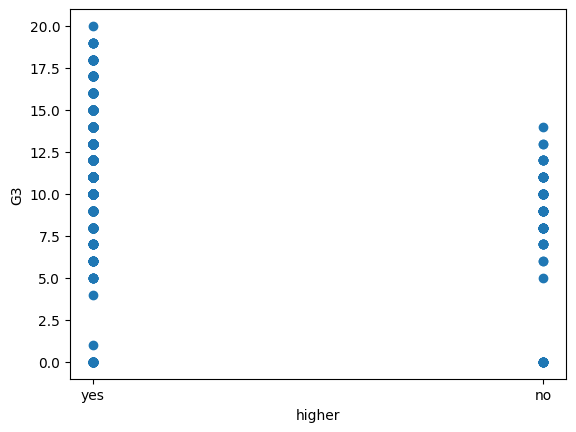

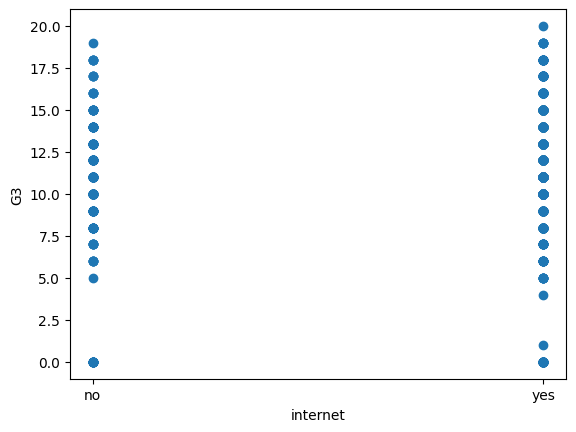

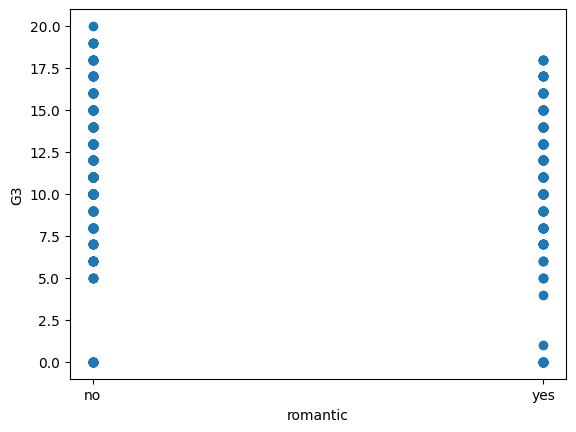

In [7]:
# I think I'll remove studytime , maybe age ,f
for i in features:
  plt.scatter(df[i],df['G3'])
  plt.xlabel(i)
  plt.ylabel('G3')
  plt.show()

In [8]:
X = data[['studytime','age','paid','failures','absences', 'G1' , 'G2' ]]
y = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

model = LinearRegression()
model.fit(X_train,y_train)
score = model.score(X_test,y_test)
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(score)
print(f"MSE: {mse}, R^2: {r2}")

0.8327367920583988
MSE: 2.8377345668584963, R^2: 0.8327367920583988


In [13]:
mse = float('inf')  # Start with a large MSE
r2 = 0
score = 0
while mse > 1 and r2 < 0.95 and score < 0.95:

  X = data[['studytime','age','paid','failures','absences', 'G1' , 'G2' ]]
  y = data['G3']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )

  model = LinearRegression(fit_intercept=False)
  model.fit(X_train,y_train)
  score = model.score(X_test,y_test)
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  r2 = r2_score(y_test, pred)
  print(f"MSE: {mse} , R^2: {r2} , Score: {score}")
print(score)
print(f"MSE: {mse}, R^2: {r2}")
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("\033[92mModel saved successfully!\033[0m")

MSE: 2.178638916831607 , R^2: 0.8484187619842096 , Score: 0.8484187619842096
MSE: 2.0702084464722352 , R^2: 0.8731995221951465 , Score: 0.8731995221951465
MSE: 2.8917678530073085 , R^2: 0.820758665704757 , Score: 0.820758665704757
MSE: 2.7073941819662966 , R^2: 0.8472209422113377 , Score: 0.8472209422113377
MSE: 2.694211281937214 , R^2: 0.7950937719707848 , Score: 0.7950937719707848
MSE: 2.0340640694326217 , R^2: 0.8408123454850768 , Score: 0.8408123454850768
MSE: 2.389687240164354 , R^2: 0.8430680288510343 , Score: 0.8430680288510343
MSE: 2.820441437532762 , R^2: 0.8239445903802798 , Score: 0.8239445903802798
MSE: 3.3343538685666667 , R^2: 0.8141136401157061 , Score: 0.8141136401157061
MSE: 1.7171176351272583 , R^2: 0.8979365409517155 , Score: 0.8979365409517155
MSE: 1.2296782633988834 , R^2: 0.900007490611035 , Score: 0.900007490611035
MSE: 1.6435427031470993 , R^2: 0.8560338724684291 , Score: 0.8560338724684291
MSE: 2.719161940232155 , R^2: 0.839200668358996 , Score: 0.8392006683589

In [11]:
linear_reg = LinearRegression()

# Step 4: Set up the parameter grid (though Linear Regression has limited parameters)
# Here we can test the fit_intercept parameter
param_grid = {
    'fit_intercept': [True, False]
}

# Step 5: Set up GridSearchCV
grid_search = GridSearchCV(estimator=linear_reg, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Step 6: Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Step 7: Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Step 8: Evaluate the model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'fit_intercept': False}
Mean Squared Error: 1.5513


In [ ]:
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions with the loaded model
predictions = loaded_model.predict(X_test)
print('mse', mean_squared_error(y_test, predictions))
print('r2', r2_score(y_test, predictions))
print('score', loaded_model.score(X_test, y_test))

mse 1.3644000488816233
r2 0.9018785853413136
score 0.9018785853413136
